setup:
- imports
- load dataset

In [6]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

%matplotlib inline
sns.set() # Setting seaborn as default style even if use only matplotlib

In [7]:
# constants
audio_features_col_names = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

In [11]:
spotify_filepath = os.path.join(os.getcwd(),'data','Spotify_Dataset_V3_local.csv')
print(spotify_filepath)

spotify_data = pd.read_csv(spotify_filepath, delimiter=";")
spotify_data.head()

/Users/neo/Documents/1-app-ml/aml-code/AML-spotify/data/Spotify_Dataset_V3_local.csv


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


data cleaning:
- Assume that 'Song URL' column is not needed
- all values are non-null, no need to remove rows
- should change "Date" column type to datetime
- dates seem reversed
    - They seems a bit jumbled

*TODO:*
- verify all years full except 2023?
- could rename columns

In [12]:
spotify_data.drop(['Song URL'], axis=1, inplace=True, errors='ignore')
# spotify_data.info()

In [27]:
# make "Date" column datetime type
spotify_data["Date"] = pd.to_datetime(spotify_data["Date"], dayfirst=True)
spotify_data.info()
spotify_data.loc[0]["Date"]

<class 'pandas.core.frame.DataFrame'>
Index: 651936 entries, 651935 to 0
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                           651

Timestamp('2023-05-29 00:00:00')

In [28]:
# reverse dates
spotify_data = spotify_data.sort_values(by="Date")
# spotify_data.head()
# ranks are also reversed now...

In [29]:
# verify all years full except 2023?
dates_present = spotify_data["Date"].unique()
# dates_present

# compare with date range equality?

random thoughts:
- rank decides the points and the points for the song are shared equally by all the artists on the track.
- why are all the song aspects [0, 1] but Loudness is [-34475, 1509]
    - https://developer.spotify.com/documentation/web-api/reference/get-audio-features says it should be [-60, 0]...
- Find top 10 artists in terms points from all data vs every year
    - Should disregard 2023? Not full year.
- Artists with the most songs in the top 200 vs 50
- Top 10 genres in terms of points from all data vs every year
- Find top 10 artists for every region
- Most frequent nationalities / continents represented

In [30]:
spotify_data.describe()

,Rank,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,2020-03-26 22:03:35.226034688,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
min,1.000000,2017-01-01 00:00:00,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,2018-08-23 00:00:00,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,2020-03-16 00:00:00,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,2021-11-16 00:00:00,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,2023-05-29 00:00:00,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000
std,57.406664,NaN,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892


In [31]:
# ignore 2023

spotify_ignore2023 = spotify_data[spotify_data["Date"].dt.year != date(2023,1,1).year].drop(audio_features_col_names, axis=1)
# spotify_ignore2023
# len(spotify_ignore2023) == len(spotify_data)
grouped_by_artist = spotify_ignore2023.groupby("Artist (Ind.)")
grouped_by_artist.head()

,Rank,Title,Artists,Date,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id
651935,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,Artist 2,Kanye West,Nationality 2,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O
651932,198,Superstition - Single Version,Stevie Wonder,2017-01-01,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog
651931,197,Oh Lord,MiC LOWRY,2017-01-01,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls
651930,196,White Iverson,Post Malone,2017-01-01,Artist 1,Post Malone,Nationality 1,United States,Anglo-America,5,5.0,6eT7xZZlB2mwyzJ2sUKG6w
651929,195,Taped up Heart (feat. Clara Mae),KREAM,2017-01-01,Artist 1,KREAM,Nationality 1,Norway,Europe,6,6.0,26hcyzSE154xMZCbFdtInA
...,...,...,...,...,...,...,...,...,...,...,...,...
42816,85,Bebe Dame,"Fuerza Regida, Grupo Frontera",2022-12-31,Artist 1,Fuerza Regida,Nationality 1,Mexico,Latin-America,116,58.0,0IKeDy5bT9G0bA7ZixRT4A
42796,168,Agudo Mágico 3,"MC K.K, Dj TG Beats, Dj Aurélio, MC Lipivox",2022-12-31,Artist 4,MC Lipivox,Nationality 4,Brazil,Latin-America,33,8.0,6Hio4nlyWL2WBL8nYlbuGt
42795,168,Agudo Mágico 3,"MC K.K, Dj TG Beats, Dj Aurélio, MC Lipivox",2022-12-31,Artist 3,Dj Aurélio,Nationality 3,Brazil,Latin-America,33,8.0,6Hio4nlyWL2WBL8nYlbuGt
42794,168,Agudo Mágico 3,"MC K.K, Dj TG Beats, Dj Aurélio, MC Lipivox",2022-12-31,Artist 2,Dj TG Beats,Nationality 2,Brazil,Latin-America,33,8.0,6Hio4nlyWL2WBL8nYlbuGt


In [32]:
#  top 10 artists in terms of points from 6 years 2017-2022 data
# grouped_by_artist.get_group('thasup')

top10_artists_overall_points = grouped_by_artist['Points (Ind for each Artist/Nat)'].sum().sort_values(ascending=False).head(10)
top10_artists_overall_points

# TODO-visu

Artist (Ind.)
Ed Sheeran       1.171907e+06
Bad Bunny        1.159068e+06
Post Malone      1.055022e+06
Billie Eilish    8.564410e+05
Drake            8.406395e+05
The Weeknd       7.907080e+05
Ariana Grande    6.713902e+05
Dua Lipa         6.630458e+05
XXXTENTACION     5.955140e+05
J Balvin         5.556763e+05
Name: Points (Ind for each Artist/Nat), dtype: float64

In [19]:
#  top 10 artists in terms of points every year

In [20]:
grouped_by_artist_year = spotify_ignore2023.groupby(["Artist (Ind.)", spotify_data.Date.dt.year])

grouped_by_artist_year.count()

Rank  Title  Artists  Date  # of Artist  \
Artist (Ind.)  Date                                            
$NOT           2021    86     86       86    86           86   
               2022     7      7        7     7            7   
$uicideboy$    2021    50     50       50    50           50   
(G)I-DLE       2018    23     23       23    23           23   
               2020    37     37       37    37           37   
...                   ...    ...      ...   ...          ...   
Ángela Aguilar 2020    13     13       13    13           13   
               2022    20     20       20    20           20   
Ñengo Flow     2020   280    280      280   280          280   
               2021     1      1        1     1            1   
               2022   158    158      158   158          158   

                     # of Nationality  Nationality  Continent  Points (Total)  \
Artist (Ind.)  Date                                                             
$NOT           2021                86           86         86              86   
               2022                 7            7          7               7   
$uicideboy$    2021                50           50         50              50   
(G)I-DLE       2018                23           23         23              23   
               2020                37           37         37              37   
...                               ...          ...        ...             ...   
Ángela Aguilar 2020                13           13         13              13   
               2022                20           20         20              20   
Ñengo Flow     2020               280          280        280             280   
               2021                 1            1          1               1   
               2022               158          158        158             158   

                     Points (Ind for each Artist/Nat)   id  
Artist (Ind.)  Date                                         
$NOT           2021                                86   86  
               2022                                 7    7  
$uicideboy$    2021                                50   50  
(G)I-DLE       2018                                23   23  
               2020                                37   37  
...                                               ...  ...  
Ángela Aguilar 2020                                13   13  
               2022                                20   20  
Ñengo Flow     2020                               280  280  
               2021                                 1    1  
               2022                               158  158  

[4480 rows x 11 columns]

In [21]:
#  top 10 artists in terms of songs from all data
# grouped_by_artist.get_group("(G)I-DLE")

top10_artists_overall_songs = grouped_by_artist.size().sort_values(ascending=False).head(10)
top10_artists_overall_songs

# TODO-visu

Artist (Ind.)
Bad Bunny        15321
Ed Sheeran       12301
Post Malone      11236
J Balvin         10571
Drake             9542
Billie Eilish     8422
The Weeknd        8414
XXXTENTACION      7264
Ozuna             7233
Dua Lipa          6841
dtype: int64

In [22]:
#  top 10 artists in terms of songs for years 2017-2022

list_top10_artists_songs = []
top10_with_year = grouped_by_artist_year.size()

def generate_top10_artists_points_year():
    for year in range(2017, 2023):
        year_top10 = top10_with_year.xs(date(year,1,1).year, level="Date").sort_values(ascending=False).head(10)
        # .size().sort_values(ascending=False).head(10)
        list_top10_artists_songs.append(year_top10)

        print("\nYEAR: ", year)
        print(year_top10)

generate_top10_artists_points_year()


YEAR:  2017
Artist (Ind.)
Ed Sheeran          3206
Drake               2382
The Chainsmokers    1697
Ozuna               1674
Kendrick Lamar      1643
Justin Bieber       1346
J Balvin            1343
Calvin Harris       1213
Post Malone         1160
The Weeknd          1149
dtype: int64

YEAR:  2018
Artist (Ind.)
Post Malone        3224
XXXTENTACION       2922
Drake              2554
J Balvin           2319
Ozuna              2092
Ed Sheeran         2079
Khalid             1831
Bad Bunny          1773
Imagine Dragons    1422
Travis Scott       1299
dtype: int64

YEAR:  2019
Artist (Ind.)
Billie Eilish    3176
Post Malone      3104
J Balvin         2448
Ed Sheeran       2195
Bad Bunny        2004
Anuel AA         1971
Ariana Grande    1958
Ozuna            1800
XXXTENTACION     1643
Queen            1525
dtype: int64

YEAR:  2020
Artist (Ind.)
Bad Bunny        3271
J Balvin         2758
Juice WRLD       2371
Billie Eilish    2017
Travis Scott     1784
Post Malone      1679
Ed Sheeran 

In [23]:
# bin

"""
#  top 10 artists in terms of songs every year
year=2017
top10_with_year = grouped_by_artist_year.size()
top10_with_year
# .sort_values(ascending=False).head(10)
# spotify_data["Date"].dt.year != date(2023,1,1).year
# grouped_by_artist_year[grouped_by_artist_year["Date"] == year]
# generate_top10_artists_points_year()

# type(top10_with_year)
top10_with_year.xs(date(2017,1,1).year, level="Date").sort_values(ascending=False).head(10)
# grouped_by_artist_year).xs("2017", level="Date")
"""

'\n#  top 10 artists in terms of songs every year\nyear=2017\ntop10_with_year = grouped_by_artist_year.size()\ntop10_with_year\n# .sort_values(ascending=False).head(10)\n# spotify_data["Date"].dt.year != date(2023,1,1).year\n# grouped_by_artist_year[grouped_by_artist_year["Date"] == year]\n# generate_top10_artists_points_year()\n\n# type(top10_with_year)\ntop10_with_year.xs(date(2017,1,1).year, level="Date").sort_values(ascending=False).head(10)\n# grouped_by_artist_year).xs("2017", level="Date")\n'

visualisations:
- visualise bar top 10 artists overall (mentions = songs_days) years 2017-2022
- visualise line top 10 artists overall (mentions = songs_days) years 2017-2022

Text(0, 0.5, '# times in top 200')

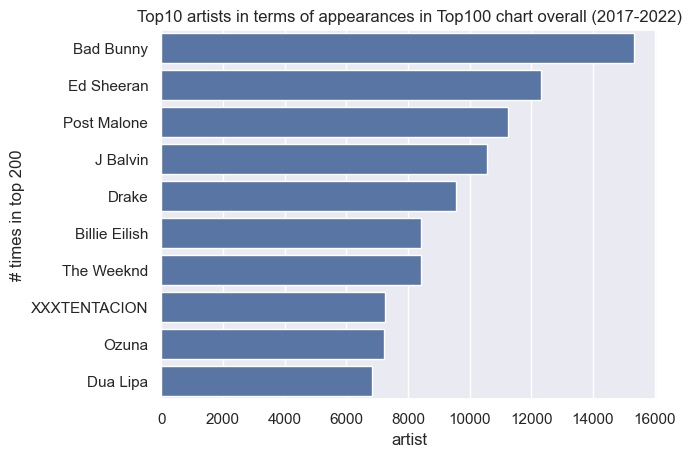

In [24]:
# visualise bar top 10 artists overall years 2017-2022
ax = sns.barplot(top10_artists_overall_songs, orient="y")

ax.set_title("Top10 artists in terms of appearances in Top100 chart overall (2017-2022)")
ax.set_xlabel("artist")
ax.set_ylabel("# times in top 200")

In [25]:
# merge top artists per year
t2017 = pd.DataFrame({'artist':list_top10_artists_songs[0].index, '2017':list_top10_artists_songs[0].values})
t2018 = pd.DataFrame({'artist':list_top10_artists_songs[1].index, '2018':list_top10_artists_songs[1].values})
t2019 = pd.DataFrame({'artist':list_top10_artists_songs[2].index, '2019':list_top10_artists_songs[2].values})
t2020 = pd.DataFrame({'artist':list_top10_artists_songs[3].index, '2020':list_top10_artists_songs[3].values})
t2021 = pd.DataFrame({'artist':list_top10_artists_songs[4].index, '2021':list_top10_artists_songs[4].values})
t2022 = pd.DataFrame({'artist':list_top10_artists_songs[5].index, '2022':list_top10_artists_songs[5].values})

df = pd.merge(t2017, t2018, on="artist", how="outer")
df = pd.merge(df, t2019, on="artist", how="outer")
df = pd.merge(df, t2020, on="artist", how="outer")
df = pd.merge(df, t2021, on="artist", how="outer")
df = pd.merge(df, t2022, on="artist", how="outer")

df= df.set_index('artist').T
df.fillna(0)

df

artist,Anuel AA,Ariana Grande,Bad Bunny,Billie Eilish,Calvin Harris,Doja Cat,Drake,Dua Lipa,Ed Sheeran,Eminem,...,Ozuna,Pop Smoke,Post Malone,Queen,Rauw Alejandro,Taylor Swift,The Chainsmokers,The Weeknd,Travis Scott,XXXTENTACION
2017,NaN,NaN,NaN,NaN,1213.0,NaN,2382.0,NaN,3206.0,NaN,...,1674.0,NaN,1160.0,NaN,NaN,NaN,1697.0,1149.0,NaN,NaN
2018,NaN,NaN,1773.0,NaN,NaN,NaN,2554.0,NaN,2079.0,NaN,...,2092.0,NaN,3224.0,NaN,NaN,NaN,NaN,NaN,1299.0,2922.0
2019,1971.0,1958.0,2004.0,3176.0,NaN,NaN,NaN,NaN,2195.0,NaN,...,1800.0,NaN,3104.0,1525.0,NaN,NaN,NaN,NaN,NaN,1643.0
2020,1445.0,NaN,3271.0,2017.0,NaN,NaN,NaN,NaN,1555.0,NaN,...,NaN,1296.0,1679.0,NaN,NaN,NaN,NaN,NaN,1784.0,NaN
2021,NaN,NaN,1796.0,1707.0,NaN,1481.0,1339.0,1771.0,1448.0,NaN,...,NaN,NaN,NaN,NaN,1415.0,NaN,NaN,1818.0,NaN,NaN
2022,NaN,NaN,5794.0,NaN,NaN,1654.0,NaN,1612.0,1818.0,1923.0,...,NaN,NaN,NaN,NaN,1463.0,1667.0,NaN,3527.0,NaN,NaN


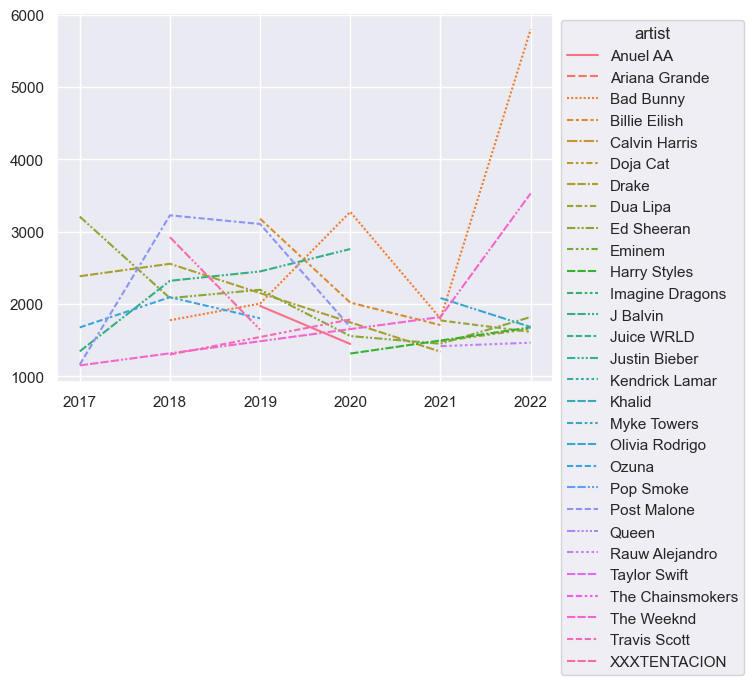

In [26]:
# visualise line top 10 artists overall years 2017-2022

ax = sns.lineplot(data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))